In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import imutils
%matplotlib inline

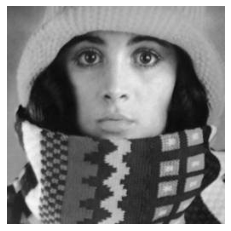

In [4]:
img = cv2.imread("trui.png",0)
plt.axis('off')
plt.imshow(img,cmap="gray")

## Sobel pour la detection de contours

In [5]:
Sobel_Wx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
], dtype=np.float64)

img_x = cv2.filter2D(src=img, ddepth=-1, kernel=Sobel_Wx)
# img_x_normalized = cv2.normalize(src=img_x, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [6]:
Sobel_Wy = Sobel_Wx.T
img_y = cv2.filter2D(src=img, ddepth=-1, kernel=Sobel_Wy)
# img_y_normalized = cv2.normalize(src=img_y, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

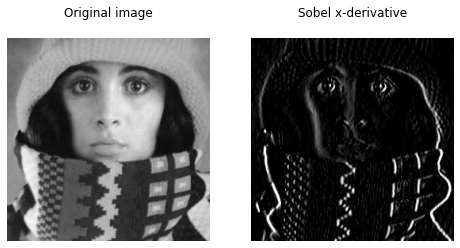

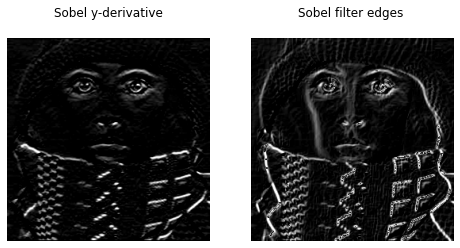

In [7]:
gradient_magnitude = img_x + img_y
# gradient_magnitude = np.sqrt(img_x**2 + img_y**2)
# gradient_magnitude *= 255.0 / gradient_magnitude.max()

fig1, axis1 = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axis1[0].imshow(img, cmap="gray")
axis1[0].set_title('Original image\n')
axis1[0].axis('off')
axis1[1].imshow(img_x, cmap="gray")
axis1[1].set_title('Sobel x-derivative\n')
axis1[1].axis('off')

fig2, axis2 = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axis2[0].imshow(img_y, cmap="gray")
axis2[0].set_title('Sobel y-derivative\n')
axis2[0].axis('off')
axis2[1].imshow(gradient_magnitude, cmap="gray")
axis2[1].set_title('Sobel filter edges \n')
axis2[1].axis('off')
plt.show()

img_x and img_y are supposed to be gray, I don't know why we've got binary images so here is another method to applay Sobel filter : 

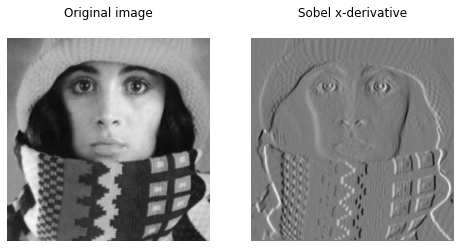

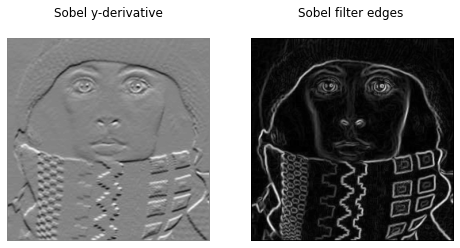

In [8]:
# Define the Sobel kernels
Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Initialize the output images
rows, cols = img.shape
img_x = np.zeros((rows, cols), dtype=np.float32)
img_y = np.zeros((rows, cols), dtype=np.float32)

# Apply the Sobel filter using nested loops
for i in range(1, rows-1):
    for j in range(1, cols-1):
        img_x[i, j] = np.sum(Gx * img[i-1:i+2, j-1:j+2])
        img_y[i, j] = np.sum(Gy * img[i-1:i+2, j-1:j+2])

# Calculate the magnitude and direction of the edges
magnitude = np.sqrt(img_x**2 + img_y**2)
direction = np.arctan2(img_y, img_x)

# Normalize the images to 0-255
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
direction = cv2.normalize(direction, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

fig1, axis1 = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axis1[0].imshow(img, cmap="gray")
axis1[0].set_title('Original image\n')
axis1[0].axis('off')
axis1[1].imshow(img_x, cmap="gray")
axis1[1].set_title('Sobel x-derivative\n')
axis1[1].axis('off')

fig2, axis2 = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axis2[0].imshow(img_y, cmap="gray")
axis2[0].set_title('Sobel y-derivative\n')
axis2[0].axis('off')
axis2[1].imshow(magnitude, cmap="gray")
axis2[1].set_title('Sobel filter edges \n')
axis2[1].axis('off')
plt.show()

## OpenCV Sobel filter

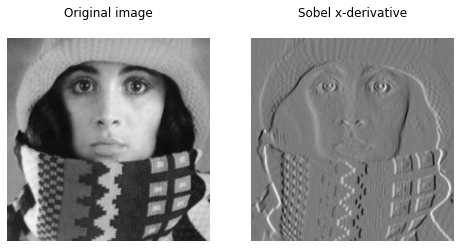

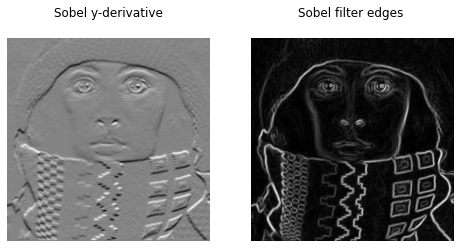

In [9]:
edgesx = cv2.Sobel(img,cv2.CV_64F, 1, 0, ksize=3)
edgesy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
# edges = edgesx + edgesy
sobel_edges = np.sqrt(np.square(edgesx) + np.square(edgesy))
sobel_edges *= 255.0 / sobel_edges.max()

fig1, axis1 = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axis1[0].imshow(img, cmap="gray")
axis1[0].set_title('Original image\n')
axis1[0].axis('off')
axis1[1].imshow(edgesx, cmap="gray")
axis1[1].set_title('Sobel x-derivative\n')
axis1[1].axis('off')

fig2, axis2 = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axis2[0].imshow(edgesy, cmap="gray")
axis2[0].set_title('Sobel y-derivative\n')
axis2[0].axis('off')
axis2[1].imshow(sobel_edges, cmap="gray")
axis2[1].set_title('Sobel filter edges \n')
axis2[1].axis('off')
plt.show()

### Comparison between Sobel filter and Canny filter

(-0.5, 255.5, 255.5, -0.5)

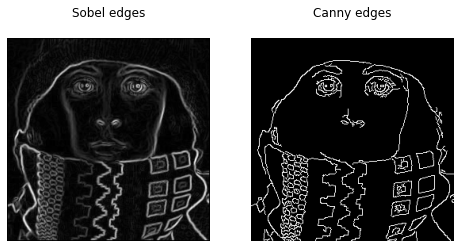

In [10]:
canny_edges = cv2.Canny(img, 30, 195)
# thresh = cv2.threshold(edges, 85, 255, cv2.THRESH_BINARY)[1]

fig1, axis1 = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axis1[0].imshow(magnitude, cmap="gray")
axis1[0].set_title('Sobel edges\n')
axis1[0].axis('off')
axis1[1].imshow(canny_edges, cmap="gray")
axis1[1].set_title('Canny edges\n')
axis1[1].axis('off')

### Comparison  
- The Canny filter uses a multi-stage approach where it first applies a Gaussian filter to smooth the image and then computes the gradient magnitude and direction using the Sobel operator. It then applies non-maximum suppression to thin out edges and finally uses hysteresis thresholding to determine strong and weak edges.  
- So basically, Canny is better than Sobel filter as it applies Sobel filter with others operations such as removing weak features/edges to get better results. Also, we can see that edges thickness is not the same : the edges produced by the Sobel filter can be thick and may not accurately represent the true edges in an image. The Canny filter, on the other hand, It is more effective at detecting thin and weak edges in an image and can produce more accurate results than the Sobel filter. The edges produced by the Canny filter are typically thinner and more precise.  
- In general, the Canny filter is more efficient than the Sobel filter in detecting edges with a high signal-to-noise ratio and thin edges, but it requires more computational resources due to its multi-step process. The Sobel filter, on the other hand, is faster and simpler, making it a good choice for real-time applications or when computational resources are limited.